## Exploratory Data Analysis

- In this notebook, I will explore the data and try to understand the data distribution and the relationship between the features and the target variable.

- I will also try to find the best features that can be used to predict the target variable.

In [3]:
# importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# importing the data

data = "/Users/alexandreribeiro/Documents/GitHub/final_project/data/clean/cleaned_city_health_metrics.csv"

df = pd.read_csv(data)

df.head()

,city,state,country,greenspacearea_km2,adjusted_obesity_rate,adjusted_smoking_rate,adjusted_exercising_rate,adjusted_chronic_rate,adjusted_life_expectancy,population_city,population_state
0,New York,New York,United States,9.58,29.080927,11.110653,48.983488,15.168457,75.069369,18908608.0,19571216
1,Chicago,Illinois,United States,0.29,22.616110,8.667252,33.856453,10.563213,52.003511,8497759.0,12549689
2,Miami,Florida,United States,35.57,8.497409,3.226864,14.601560,4.436938,20.840164,6080145.0,22610726
3,Houston,Texas,United States,52.57,6.948084,2.348648,9.668602,3.248963,14.972632,5970127.0,30503301
4,Dallas,Texas,United States,79.91,6.786088,2.293889,9.443176,3.173213,14.623542,5830932.0,30503301


#### Data Overview:

- Checking Data Types: Verifying the data types of each column to ensure they are appropriate for analysis (e.g., numeric types for continuous features, categorical types for categories).

In [8]:
df.dtypes

city                         object
state                        object
country                      object
greenspacearea_km2          float64
adjusted_obesity_rate       float64
adjusted_smoking_rate       float64
adjusted_exercising_rate    float64
adjusted_chronic_rate       float64
adjusted_life_expectancy    float64
population_city             float64
population_state              int64
dtype: object

In [4]:
df.describe()

,greenspacearea_km2,adjusted_obesity_rate,adjusted_smoking_rate,adjusted_exercising_rate,adjusted_chronic_rate,adjusted_life_expectancy,population_city,population_state
count,3361.000000,3361.000000,3361.000000,3361.000000,3361.000000,3361.000000,3.361000e+03,3.361000e+03
mean,99.317132,0.356899,0.145620,0.543922,0.183247,0.815424,8.417195e+04,1.341434e+07
std,90.988763,1.421453,0.575939,2.234051,0.724476,3.344020,4.760272e+05,1.125153e+07
min,0.010000,0.006151,0.002167,0.011995,0.003174,0.017292,8.506000e+03,5.840570e+05
25%,17.100000,0.037951,0.015056,0.061104,0.019504,0.090200,1.235600e+04,5.737915e+06
50%,74.550000,0.078786,0.031584,0.118249,0.041217,0.180180,1.934900e+04,9.290841e+06
75%,164.690000,0.194567,0.077543,0.291634,0.100211,0.445089,4.084200e+04,1.957122e+07
max,365.580000,29.080927,11.110653,48.983488,15.168457,75.069369,1.890861e+07,3.896519e+07


**Observations from describe():**

Green Space Area (greenspacearea_km2):

- The mean green space area is 99.32 km² with a standard deviation of 90.99 km², indicating significant variability across cities.
- The maximum value is 365.58 km², which suggests some cities have extensive green spaces.

Health Metrics:

- Metrics like adjusted_obesity_rate, adjusted_smoking_rate, and adjusted_exercising_rate have high standard deviations relative to their means, which indicates considerable variation across cities.
- For instance, the adjusted_obesity_rate ranges from 0.006 to 29.08, showing a wide disparity in obesity rates among different cities.

Life Expectancy (adjusted_life_expectancy):

- The mean life expectancy is 0.8154 with a significant standard deviation of 3.3440, which might suggest that the feature is scaled or normalized in some way.

In [6]:
# checking for missing values

df.isnull().sum()

city                        0
state                       0
country                     0
greenspacearea_km2          0
adjusted_obesity_rate       0
adjusted_smoking_rate       0
adjusted_exercising_rate    0
adjusted_chronic_rate       0
adjusted_life_expectancy    0
population_city             0
population_state            0
dtype: int64

#### Correlation Matrix and Heatmap:

- Exploring the relationship between the features and the target variable using a correlation matrix and heatmap.

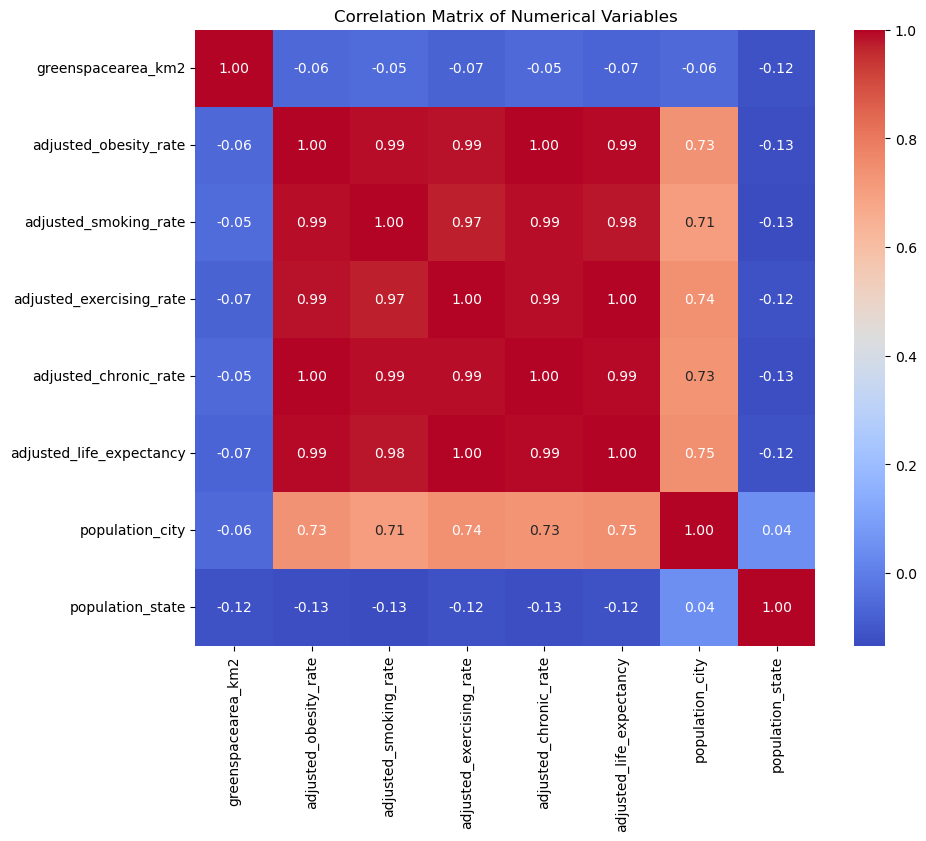

In [9]:
# Select only the numerical columns for correlation matrix

numerical_columns = [
    'greenspacearea_km2', 
    'adjusted_obesity_rate', 
    'adjusted_smoking_rate', 
    'adjusted_exercising_rate', 
    'adjusted_chronic_rate', 
    'adjusted_life_expectancy',
    'population_city',
    'population_state'
]

# Calculate the correlation matrix

corr_matrix = df[numerical_columns].corr()

# Plot a heatmap of the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

- Since we have a very weak or no correlation between green_space_are and the health metrics, we going to explore non-linear relations through polynomial features.

In [10]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (degree 2 as an example)

poly = PolynomialFeatures(degree=2, include_bias=False)
polynomial_features = poly.fit_transform(df[['greenspacearea_km2']])

# Convert to DataFrame and add column names

poly_df = pd.DataFrame(polynomial_features, columns=poly.get_feature_names_out(['greenspacearea_km2']))

# Merge with the original dataframe

df_poly = pd.concat([df, poly_df], axis=1)

# Display the new dataframe with polynomial features

print(df_poly.head())

       city     state        country  greenspacearea_km2  \
0  New York  New York  United States                9.58   
1   Chicago  Illinois  United States                0.29   
2     Miami   Florida  United States               35.57   
3   Houston     Texas  United States               52.57   
4    Dallas     Texas  United States               79.91   

   adjusted_obesity_rate  adjusted_smoking_rate  adjusted_exercising_rate  \
0              29.080927              11.110653                 48.983488   
1              22.616110               8.667252                 33.856453   
2               8.497409               3.226864                 14.601560   
3               6.948084               2.348648                  9.668602   
4               6.786088               2.293889                  9.443176   

   adjusted_chronic_rate  adjusted_life_expectancy  population_city  \
0              15.168457                 75.069369       18908608.0   
1              10.563213          

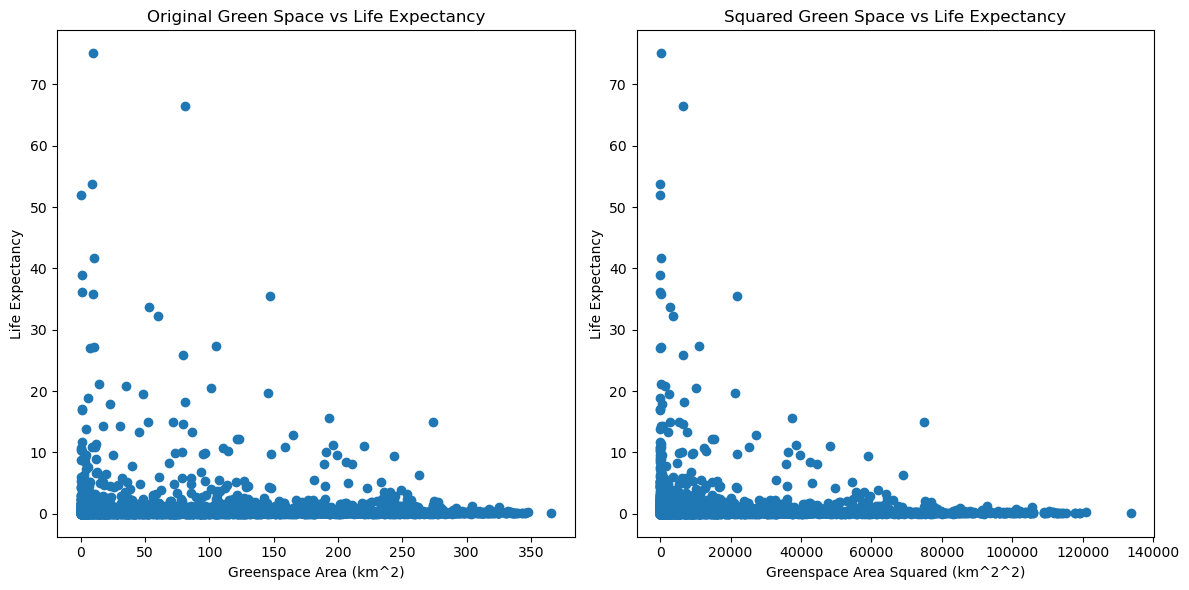

In [13]:
# Scatter plot for the original green space area

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['greenspacearea_km2'], df['adjusted_life_expectancy'])
plt.title('Original Green Space vs Life Expectancy')
plt.xlabel('Greenspace Area (km^2)')
plt.ylabel('Life Expectancy')

# Scatter plot for the squared green space area

plt.subplot(1, 2, 2)
plt.scatter(df_poly['greenspacearea_km2^2'], df_poly['adjusted_life_expectancy'])
plt.title('Squared Green Space vs Life Expectancy')
plt.xlabel('Greenspace Area Squared (km^2^2)')
plt.ylabel('Life Expectancy')

plt.tight_layout()
plt.show()

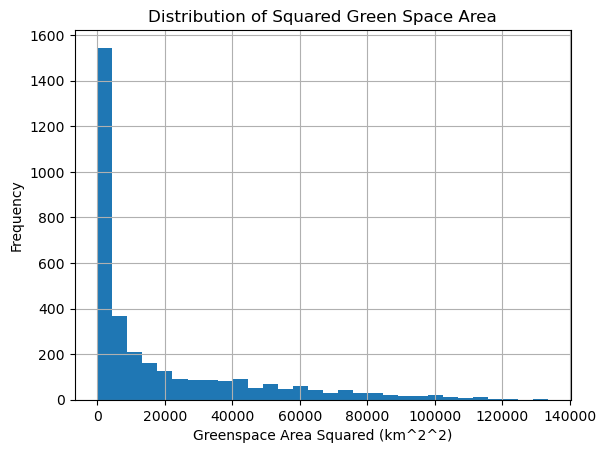

In [14]:
# Histogram of the squared green space area

df_poly['greenspacearea_km2^2'].hist(bins=30)
plt.title('Distribution of Squared Green Space Area')
plt.xlabel('Greenspace Area Squared (km^2^2)')
plt.ylabel('Frequency')
plt.show()

#### Considerations:

1.	Relationship between Green Space and Life Expectancy:

- The scatter plots indicate that there isn’t a strong or clear relationship between green space (both original and squared) and life expectancy. This suggests that either green space doesn’t directly influence life expectancy in your dataset, or that the relationship is more complex and might involve interactions with other variables.
- The squared term did not reveal a stronger relationship, which might indicate that a simple polynomial transformation isn’t sufficient to capture the potential effects of green space on life expectancy.

2.	Distribution and Potential Outliers:

- The skewness and long tail in the distribution of the squared green space area highlight potential issues with outliers. These extreme values might disproportionately influence your model, leading to overfitting or instability.
- Before proceeding with modeling, consider whether to transform this feature (e.g., log transformation) or to apply techniques to manage outliers.

#### Next Steps:

- Interaction Terms: Creating interaction terms between green space and exercise rate to capture potential synergistic effects.

In [15]:
# Calculate the correlation between green space and exercise rate

correlation = df['greenspacearea_km2'].corr(df['adjusted_exercising_rate'])
print(f'Correlation between Green Space Area and Exercise Rate: {correlation:.2f}')

Correlation between Green Space Area and Exercise Rate: -0.07


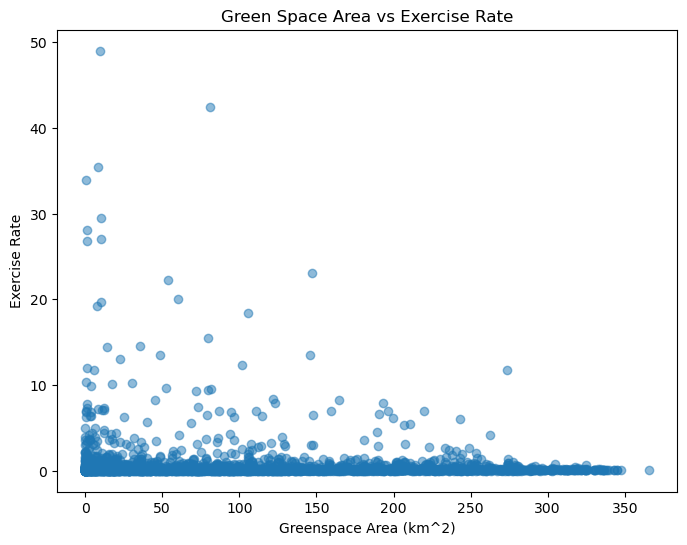

In [20]:
import matplotlib.pyplot as plt

# Scatter plot between green space area and exercise rate

plt.figure(figsize=(8, 6))
plt.scatter(df['greenspacearea_km2'], df['adjusted_exercising_rate'], alpha=0.5)
plt.title('Green Space Area vs Exercise Rate')
plt.xlabel('Greenspace Area (km^2)')
plt.ylabel('Exercise Rate')
plt.show()

#### New dataset where it was added the AQI (Air Quality Index), depression rate and chronic pulmonary disease rate for each city.